# Run a Disease Propagation in a lattice environment

## Lattice lengends
In the latice matrix, we set 0 as a cell that is not populated, 1 as populated, and 2 as infected with the diseases.

## Method
In the initial for loop, we will iterate through the matrix and then use numpy random library to determine if the cell is populated or not. After that, if the cell is populated, we will again use numpy random library to determine if that specific populated cell is infected or not.

## Computing the number of infected and populated cells
To save computing processing time, we will create a list to store the number of infected and populated cells in each generation.

## About Infection and Immunity in the Present Generation

If the cell is infected or recovered in that specific generation, it cant be infected

## About Immunity

A cell has a 5% chance of having permanent immunity after being infected.

In [248]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Creating a Cell class
In each cell, we will create a class called Cell. We use this to keep track of the state of the cell. We want to include features such as the duration of the infection, the duration of immunity, and the state of the cell, whether it is populated or infected.

### Duration of the immunity
The duration of the immunity is different for each cell. The duration ranges from 5-15 generations.
### Duration of the infection
The duration of the infection is different for each cell. The duration ranges from 1-10 generations.

In [249]:
class Cell:
    def __init__(self, state, duration, immunity):
        self.state = state
        self.duration = duration
        self.immunity = immunity
        self.infected_duration = 0
        self.immuned_duration = 0
        self.recently_infected = False # If the agent is infected in the present generation, it cant affect any agent in that generation.
        self.recently_recovered = False
        self.perfect_immunity = False
    def check_immunity(self):
        """_summary_
        Checks if the agent is immune.
        If yes, return True.
        If no, return False
        Returns:
            _type_: _description_
        """
        if self.perfect_immunity == True:
            return True
        if self.immuned_duration > 0:
            return True
        else:
            return False
    def check_infection(self):
        """_summary_
        Checks if the agent is infected.
        If yes, return True and subtract 1 from the infected duration. If infected_duration<0, set the state to 1 and set the state of immuned_duration equal to immunity.
        If no, return False
        Returns:
            _type_: _description_
        """
        if self.state == 2:
            return True
        else:
            return False
    def subtract_duration(self):
        if self.infected_duration > 0:
            self.infected_duration -= 1
            if self.infected_duration == 0:
                self.recently_recovered = True
        if self.immuned_duration > 0:
            self.immuned_duration -= 1
    def check_state(self):
        self.recently_recovered = False
        self.subtract_duration()
        if (self.infected_duration == 0 and self.state == 2):
            self.state = 1
            self.immuned_duration = self.immunity
            self.recently_recovered = True
            if self.recently_recovered == True:
                if np.random.random() <= 0.05:
                    self.perfect_immunity = True
        self.recently_infected = False
    def just_infected(self):
        self.recently_infected = True
        self.infected_duration = self.duration
    def __str__(self):
        return f"State : {self.state}\nInfection duration:{self.duration}\nImmunity duration:{self.immunity}\nInfected duration:{self.infected_duration}\nImmuned duration:{self.immuned_duration}"

In [250]:
np.random.random() < 0.05

False

In [251]:
N = 100 # a matrix of NxN environment
p0 =0.80 #probability of a certain cell in the NXN environment to have an agent
pt = [x/10 for x in list(range(1,10,1))] #probability of disease propagation, from 0.1-0.9 with a step of 0.1
generations = 100
pt1 = pt[0]


In [252]:
lattice = np.empty((N,N), dtype = object)

In [253]:
infected_generation = np.zeros(100) # this gives us the number of infected cells in each generation
susceptible_generation = np.zeros(100) 
recovered_generation = np.zeros(100)
populated_generation = 0 # this gives us the number of populated cells in each generation

## Populate the lattice

In [254]:
row_number = 100
col_number = 100
for row in range(row_number):
    for col in range(col_number):
        #make a class for the cell in lattice[row,,coll]
        lattice[row,col] = Cell(state = 0, duration = np.random.randint(5,15), immunity = np.random.randint(1,10))
        #make a random choice with probability of 1 being 0.8 and probability of 0 being 0.2
        lattice[row,col].state = np.random.choice([0,1], p = [1-p0,p0])
        if lattice[row,col].state == 1:
            lattice[row,col].state = np.random.choice([1,2], p = [0.99,0.01])
            if lattice[row,col].state == 2:
                lattice[row,col].infected_duration = lattice[row,col].duration
#This is the first generation.
# Count the number of infected cells (state == 2) and populated cells (state != 0)
infected_generation[0] = sum(cell.state == 2 for row in lattice for cell in row)
# count the number of non_zero cells (state!= 0)
populated_generation = sum(cell.state != 0 for row in lattice for cell in row)
print("The number of infected cells in the first generation is: ", infected_generation[0])
print("The number of populated cells in the first generation is: ", populated_generation)


The number of infected cells in the first generation is:  84.0
The number of populated cells in the first generation is:  8033


In the code above, we have created a lattice of 100x100 cells. Each cell has a state, duration of the infection, and duration of the immunity. We can check some cells in the lattice to see the different features.

In [255]:
print(lattice[0,1])
print(lattice[26,35])

State : 1
Infection duration:11
Immunity duration:7
Infected duration:0
Immuned duration:0
State : 1
Infection duration:7
Immunity duration:3
Infected duration:0
Immuned duration:0


In [256]:
infected_states = []
for row in lattice:
    for cell in row:
        if cell.state == 2:
            infected_states.append(cell)

print(infected_states[1])
print(infected_states[2])

State : 2
Infection duration:5
Immunity duration:6
Infected duration:5
Immuned duration:0
State : 2
Infection duration:10
Immunity duration:2
Infected duration:10
Immuned duration:0


## Neighbour of a cell
The neighbour of a cell is it's left, right, top, and bottom cell. Meaning that a cell can infect a cell in the left, right, top, bottom, upper right, upper left, bottom right, and bottom left cell.

## Infecting the neighbour of a cell
To infect a neighbour of a cell, first, it needs to check if the cell is populated and not infected. If it is, we will then check if that specific cell is immune or not.
Since lattice[row,col], meaning that the

**upper neighbor** is lattice[row-1,col]

**the lower neighbor** is lattice[row+1,col]

**the left neighbor** is lattice[row,col-1]

**the right neighbor** is lattice[row,col+1].

**the upper right neighbor** is lattice[row-1,col+1]

**the upper left neighbor** is lattice[row-1,col-1]

**the lower right neighbor** is lattice[row+1,col+1]

**the lower left neighbor** is lattice[row+1,col-1].

Unfortunately, python's way of pass by reference is complicated. That is why we cant use a reusable function to make our code cleaner (or so I know).


### Algorithm for infection

The algorithm for infection is as follows:
- For each cell in the lattice:
    - If the cell is infected:
        - If the upper neighbour is populated and not infected:
            - If the upper neighbour is not immune:
                Change state based on the probability of infection (pt)
        Do the same for the other neighbours
Check the state of each cell in the lattice and then subtract the duration of the immunity and infection.

Do this for each generation.




In [257]:
for generation in [x+2 for x in list(range(generations-1))]:
    for row in range(row_number):
        for col in range(col_number):
            if lattice[row,col].recently_infected == True:
                continue #if the agent is recently infected, it cant affect any agent.
            if lattice[row,col].state == 2:
                #upper neighbour
                if row > 0: #to avoid index error
                    if lattice[row-1,col].state == 1: #upper neighbour
                        if lattice[row-1,col].check_immunity() == False:
                            lattice[row-1,col].state =  np.random.choice([1,2], p = [1-pt1,pt1])
                            if lattice[row-1,col].state == 2:
                                lattice[row-1,col].just_infected()

                #lower neighbour
                if row < row_number-1: #to avoid index error
                    if lattice[row+1,col].state == 1: #lower neighbour
                        if lattice[row+1,col].check_immunity() == False:
                            lattice[row+1,col].state =  np.random.choice([1,2], p = [1-pt1,pt1])
                            if lattice[row+1,col].state == 2:
                                lattice[row+1,col].just_infected()

                #left neighbour
                if col > 0: #to avoid index error
                    if lattice[row,col-1].state == 1: #left neighbour
                        if lattice[row,col-1].check_immunity() == False:
                            lattice[row,col-1].state =  np.random.choice([1,2], p = [1-pt1,pt1])
                            if lattice[row,col-1].state == 2:
                                lattice[row,col-1].just_infected()

                #right neighbour
                if col < col_number-1: #to avoid index error
                    if lattice[row,col+1].state == 1: #right neighbour
                        if lattice[row,col+1].check_immunity() == False:
                            lattice[row,col+1].state =  np.random.choice([1,2], p = [1-pt1,pt1])
                            if lattice[row,col+1].state == 2:
                                lattice[row,col+1].just_infected()
                #upper right neighbour
                if row > 0 and col < col_number-1: #to avoid index error
                    if lattice[row-1,col+1].state == 1: #upper right neighbour
                        if lattice[row-1,col+1].check_immunity() == False:
                            lattice[row-1,col+1].state =  np.random.choice([1,2], p = [1-pt1,pt1])
                            if lattice[row-1,col+1].state == 2:
                                lattice[row-1,col+1].just_infected()
                #upper left neighbour
                if row > 0 and col > 0: #to avoid index error
                    if lattice[row-1,col-1].state == 1: #upper left neighbour
                        if lattice[row-1,col-1].check_immunity() == False:
                            lattice[row-1,col-1].state =  np.random.choice([1,2], p = [1-pt1,pt1])
                            if lattice[row-1,col-1].state == 2:
                                lattice[row-1,col-1].just_infected()
                #lower right neighbour
                if row < row_number-1 and col < col_number-1: #to avoid index error
                    if lattice[row+1,col+1].state == 1: #lower right neighbour
                        if lattice[row+1,col+1].check_immunity() == False:
                            lattice[row+1,col+1].state =  np.random.choice([1,2], p = [1-pt1,pt1])
                            if lattice[row+1,col+1].state == 2:
                                lattice[row+1,col+1].just_infected()
                #lower left neighbour
                if row < row_number-1 and col > 0: #to avoid index error
                    if lattice[row+1,col-1].state == 1: #lower left neighbour
                        if lattice[row+1,col-1].check_immunity() == False:
                            lattice[row+1,col-1].state =  np.random.choice([1,2], p = [1-pt1,pt1])
                            if lattice[row+1,col-1].state == 2:
                                lattice[row+1,col-1].just_infected()
    #After the iteration, iterate again for checking the state and removing duration
    for row in range(row_number):
        for col in range(col_number):
            lattice[row,col].check_state()

    infected_generation[generation-1] = sum(cell.state == 2 for row in lattice for cell in row)
    susceptible_generation[generation-1] = sum(cell.state != 0 for row in lattice for cell in row) - infected_generation[generation-1]
    recovered_generation[generation-1] = sum((cell.immuned_duration > 0 or cell.perfect_immunity == True) for row in lattice for cell in row)
    print("The number of infected cells in the", generation, "generation is: ", infected_generation[generation-1])
    print("The number of susceptible cells in the", generation, "generation is: ", susceptible_generation[generation-1])
    print("The number of recovered cells in the", generation, "generation is: ", recovered_generation[generation-1])
    

The number of infected cells in the 2 generation is:  136.0
The number of susceptible cells in the 2 generation is:  7897.0
The number of recovered cells in the 2 generation is:  0.0
The number of infected cells in the 3 generation is:  211.0
The number of susceptible cells in the 3 generation is:  7822.0
The number of recovered cells in the 3 generation is:  0.0
The number of infected cells in the 4 generation is:  304.0
The number of susceptible cells in the 4 generation is:  7729.0
The number of recovered cells in the 4 generation is:  0.0
The number of infected cells in the 5 generation is:  424.0
The number of susceptible cells in the 5 generation is:  7609.0
The number of recovered cells in the 5 generation is:  0.0
The number of infected cells in the 6 generation is:  550.0
The number of susceptible cells in the 6 generation is:  7483.0
The number of recovered cells in the 6 generation is:  18.0
The number of infected cells in the 7 generation is:  692.0
The number of susceptibl

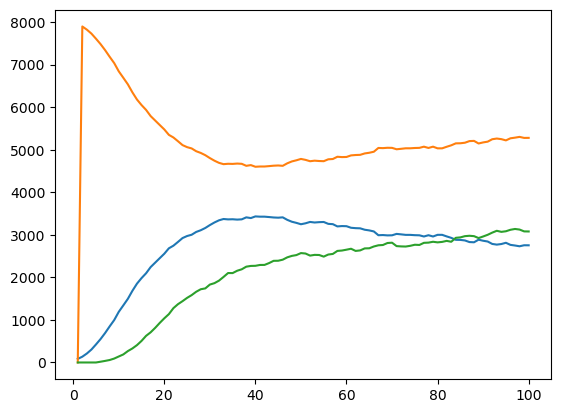

In [258]:
plt.plot([x+1 for x in list(range(generations))], infected_generation)
plt.plot([x+1 for x in list(range(generations))], susceptible_generation)
plt.plot([x+1 for x in list(range(generations))], recovered_generation)

# Determining the percentage of infected cells to the total population for probability of transmission of 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9

In [259]:
infected_array = np.empty((len(pt), generations))
percentage_infected = np.zeros(len(pt))

In [260]:
for i,prob_infection in enumerate(pt):
    for row in range(row_number):
        for col in range(col_number):
            #make a class for the cell in lattice[row,,coll]
            lattice[row,col] = Cell(state = 0, duration = np.random.randint(2,4), immunity = np.random.randint(1,10))
            #make a random choice with probability of 1 being 0.8 and probability of 0 being 0.2
            lattice[row,col].state = np.random.choice([0,1], p = [1-p0,p0])
            if lattice[row,col].state == 1:
                lattice[row,col].state = np.random.choice([1,2], p = [0.99,0.01])
                if lattice[row,col].state == 2:
                    lattice[row,col].infected_duration = lattice[row,col].duration
    #This is the first generation.
    # Count the number of infected cells (state == 2) and populated cells (state != 0)
    infected_array[i,0] = sum(cell.state == 2 for row in lattice for cell in row)
    # count the number of non_zero cells (state!= 0)
    populated_generation = sum(cell.state != 0 for row in lattice for cell in row)
    for generation in [x+2 for x in list(range(generations-1))]:
        for row in range(row_number):
            for col in range(col_number):
                if lattice[row,col].recently_infected == True:
                    continue #if the agent is recently infected, it cant affect any agent.
                if lattice[row,col].state == 2:
                    #upper neighbour
                    if row > 0: #to avoid index error
                        if lattice[row-1,col].state == 1: #upper neighbour
                            if lattice[row-1,col].check_immunity() == False:
                                lattice[row-1,col].state =  np.random.choice([1,2], p = [1-prob_infection,prob_infection])
                                if lattice[row-1,col].state == 2:
                                    lattice[row-1,col].just_infected()

                    #lower neighbour
                    if row < row_number-1: #to avoid index error
                        if lattice[row+1,col].state == 1: #lower neighbour
                            if lattice[row+1,col].check_immunity() == False:
                                lattice[row+1,col].state =  np.random.choice([1,2], p = [1-prob_infection,prob_infection])
                                if lattice[row+1,col].state == 2:
                                    lattice[row+1,col].just_infected()

                    #left neighbour
                    if col > 0: #to avoid index error
                        if lattice[row,col-1].state == 1: #left neighbour
                            if lattice[row,col-1].check_immunity() == False:
                                lattice[row,col-1].state =  np.random.choice([1,2], p = [1-prob_infection,prob_infection])
                                if lattice[row,col-1].state == 2:
                                    lattice[row,col-1].just_infected()

                    #right neighbour
                    if col < col_number-1: #to avoid index error
                        if lattice[row,col+1].state == 1: #right neighbour
                            if lattice[row,col+1].check_immunity() == False:
                                lattice[row,col+1].state =  np.random.choice([1,2], p = [1-prob_infection,prob_infection])
                                if lattice[row,col+1].state == 2:
                                    lattice[row,col+1].just_infected()
                    #upper left neighbour
                    if row > 0 and col > 0: #to avoid index error
                        if lattice[row-1,col-1].state == 1: #upper left neighbour
                            if lattice[row-1,col-1].check_immunity() == False:
                                lattice[row-1,col-1].state =  np.random.choice([1,2], p = [1-prob_infection,prob_infection])
                                if lattice[row-1,col-1].state == 2:
                                    lattice[row-1,col-1].just_infected()

                    #upper right neighbour
                    if row > 0 and col < col_number-1: #to avoid index error
                        if lattice[row-1,col+1].state == 1: #upper right neighbour
                            if lattice[row-1,col+1].check_immunity() == False:
                                lattice[row-1,col+1].state =  np.random.choice([1,2], p = [1-prob_infection,prob_infection])
                                if lattice[row-1,col+1].state == 2:
                                    lattice[row-1,col+1].just_infected()

                    #lower right neighbour
                    if row < row_number-1 and col < col_number-1: #to avoid index error
                        if lattice[row+1,col+1].state == 1: #lower right neighbour
                            if lattice[row+1,col+1].check_immunity() == False:
                                lattice[row+1,col+1].state =  np.random.choice([1,2], p = [1-prob_infection,prob_infection])
                                if lattice[row+1,col+1].state == 2:
                                    lattice[row+1,col+1].just_infected()
                    #lower left neighbour
                    if row < row_number-1 and col > 0: #to avoid index error
                        if lattice[row+1,col-1].state == 1: #lower left neighbour
                            if lattice[row+1,col-1].check_immunity() == False:
                                lattice[row+1,col-1].state =  np.random.choice([1,2], p = [1-prob_infection,prob_infection])
                                if lattice[row+1,col-1].state == 2:
                                    lattice[row+1,col-1].just_infected()
        #After the iteration, iterate again for checking the state and removing duration
        for row in range(row_number):
            for col in range(col_number):
                lattice[row,col].check_state()
        # Count the number of infected cells (state == 2) and populated cells (state != 0)
        infected_array[i,generation-1] = sum(cell.state == 2 for row in lattice for cell in row)
    percentage_infected[i] = infected_array[i, generations-1]/sum(cell.state != 0 for row in lattice for cell in row) * 100

Text(0.5, 1.0, 'Percentage of infected cells vs. Probability of infection')

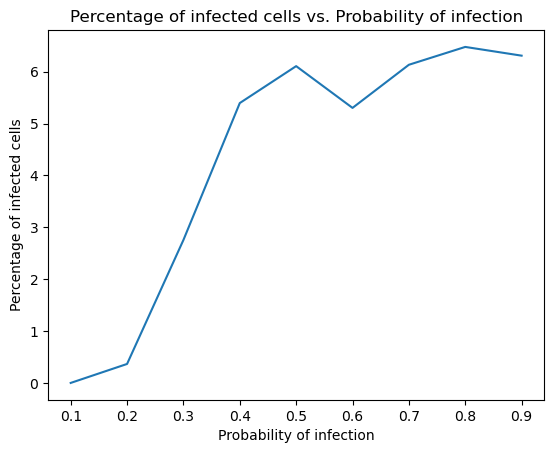

In [261]:
sns.lineplot(x = pt, y = percentage_infected)
plt.xlabel("Probability of infection")
plt.ylabel("Percentage of infected cells")
plt.title("Percentage of infected cells vs. Probability of infection")

## Visualizing the number of infected cells for different probability of transmission

In [262]:
infected_array

array([[7.400e+01, 1.190e+02, 1.350e+02, 8.900e+01, 5.900e+01, 4.300e+01,
        3.200e+01, 2.100e+01, 1.200e+01, 9.000e+00, 1.000e+01, 7.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

c:\Users\jacob\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


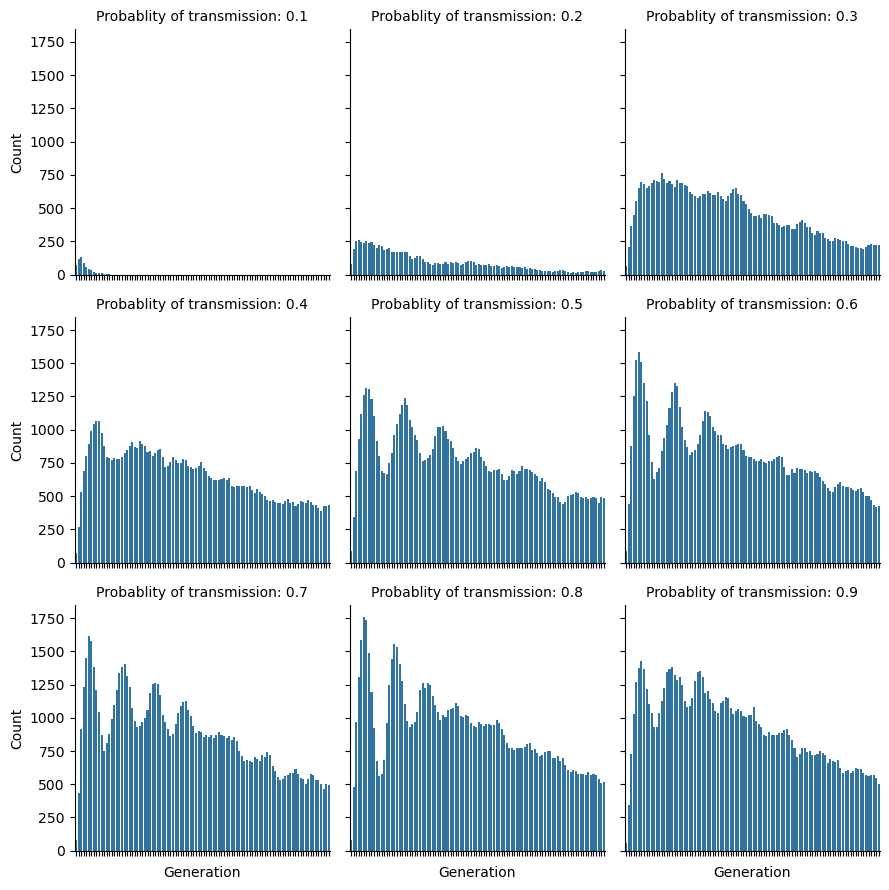

In [263]:
df = pd.DataFrame(infected_array).T
df.index = [generation for generation in range(1,generations+1)]
df.index.name = 'generation'
df.columns = pt
# Melt the DataFrame to long format
df_melted = df.reset_index().melt(id_vars='generation', var_name='probability', value_name='count')
g = sns.FacetGrid(df_melted, col='probability', col_wrap=3, sharey=True)
g.map(sns.barplot, 'generation', 'count')

# Adjust layout
g.set_titles(col_template='Probablity of transmission: {col_name}')
g.set_axis_labels('Generation', 'Count')
for ax in g.axes.flat:
    ax.set_xticklabels([])

plt.tight_layout()
plt.show()

In [264]:
df_melted

,generation,probability,count
0,1,0.1,74.0
1,2,0.1,119.0
2,3,0.1,135.0
3,4,0.1,89.0
4,5,0.1,59.0
...,...,...,...
895,96,0.9,563.0
896,97,0.9,571.0
897,98,0.9,573.0
898,99,0.9,544.0
